## Export GW Distances as numpy array pkl

In [13]:
from pathlib import Path
import numpy as np
from heartnet import gw_utils
import pickle

gw_output_dir = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/icg_cluster_results/celltype_config64_2023-08-31T232439")
output_dir = Path(f"/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/GW Distance Arrays")
exclude = []   # Samples to exclude from the distance matrices

# Get GW distances
gw_distances_dict = gw_utils.gw_dist_from_pkl(gw_output_dir, exclude=exclude)
entr_gw_distances_dict = gw_utils.entr_gw_dist_from_pkl(gw_output_dir, exclude=exclude)

# Turn into np.array
gw_distances_array, index = gw_utils.tuple_dict_to_2d_array(gw_distances_dict, symmetric=True)
entr_gw_distances_array, entr_index = gw_utils.tuple_dict_to_2d_array(entr_gw_distances_dict, symmetric=True)

with open(output_dir.joinpath(f"{gw_output_dir.name}_gw_dist.pkl"), 'wb') as f:
    pickle.dump(gw_distances_array, f)
with open(output_dir.joinpath(f"{gw_output_dir.name}_index.pkl"), 'wb') as f:
    pickle.dump(index, f)

with open(output_dir.joinpath(f"{gw_output_dir.name}_entr_gw_dist.pkl"), 'wb') as f:
    pickle.dump(entr_gw_distances_array, f)
with open(output_dir.joinpath(f"{gw_output_dir.name}_entr_index.pkl"), 'wb') as f:
    pickle.dump(entr_index, f)


## Plot GW distances matrices

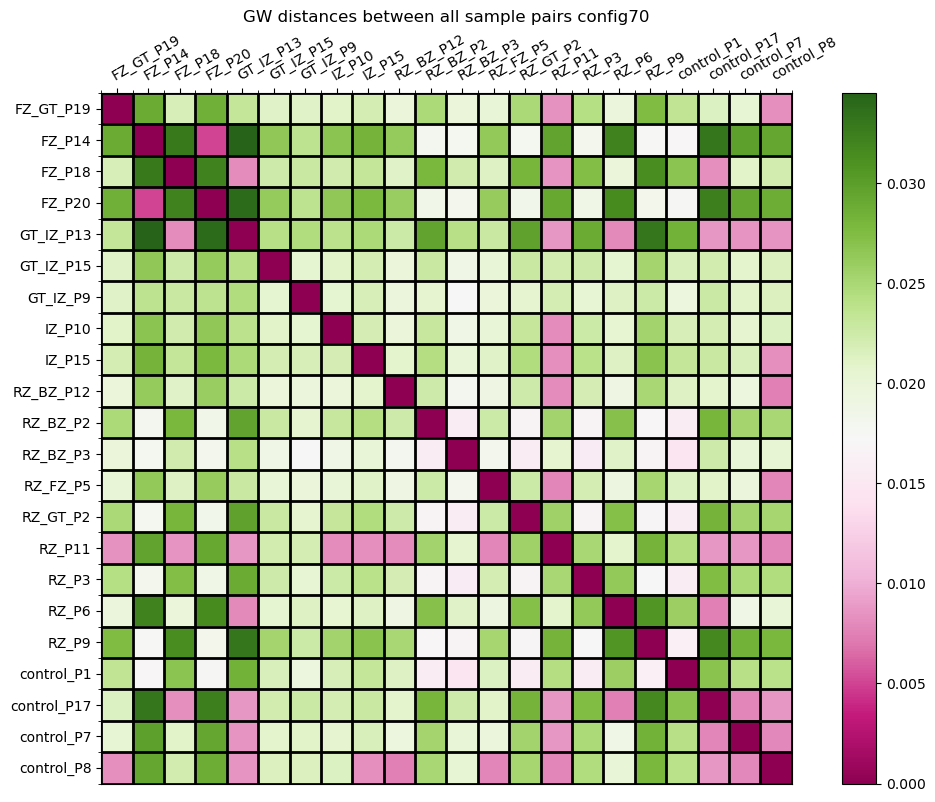

In [7]:
from pathlib import Path
import matplotlib.pyplot as plt
from heartnet import gw_utils
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

config_num = 70
gw_output_dir = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/icg_cluster_results/config70_2023-09-02T094244")
exclude = []   # Samples to exclude from the distance matrices

# Get GW distances
gw_distances_dict = gw_utils.gw_dist_from_pkl(gw_output_dir, exclude=exclude)

# Turn into np.array
gw_distances_array, index = gw_utils.tuple_dict_to_2d_array(gw_distances_dict, symmetric=True)

num_samples = gw_distances_array.shape[0]

# Plot
fig, ax = plt.subplots(figsize=(10,10))

# Major ticks
ax.set_xticks(np.arange(0, num_samples, 1),labels=index)
ax.set_yticks(np.arange(0, num_samples, 1),labels=index)

# Minor ticks
ax.set_xticks(np.arange(-.5, num_samples, 1), minor=True)
ax.set_yticks(np.arange(-.5, num_samples, 1), minor=True)

# Rotate x_ticks
ax.tick_params(axis='x', top=True, bottom=False, labeltop=True, labelbottom=False, which='both')
plt.setp(ax.get_xticklabels(), rotation=30, ha='left', rotation_mode='anchor')

# Plot image
img = ax.imshow(gw_distances_array, cmap="PiYG", vmin=0)
ax.grid(which='minor', c='black', linewidth=2)
ax.set_title(f"GW distances between all sample pairs config{config_num}")

# Colorbar with same height as plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(img, cax=cax)

In [39]:
# Save the figure
file_name = f"GW_all_samples_config{config_num}.pdf"
save_file = gw_output_dir.joinpath(file_name)

fig.savefig(save_file, bbox_inches='tight')

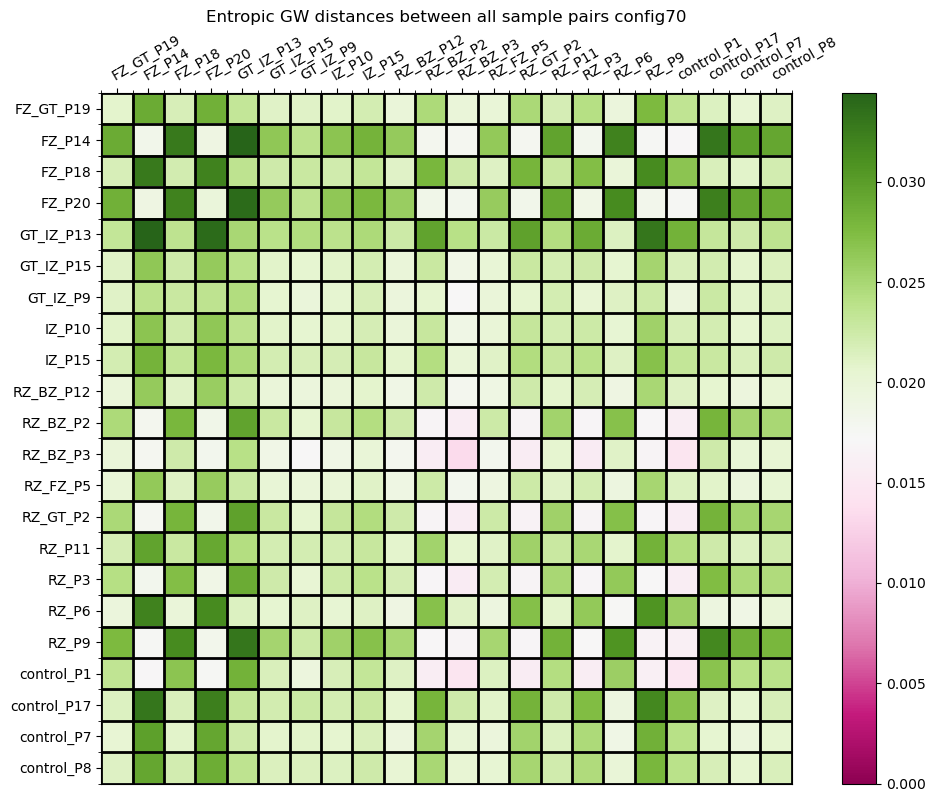

In [8]:
from pathlib import Path
import matplotlib.pyplot as plt
from heartnet import gw_utils
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# config_num = 70
# gw_output_dir = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/icg_cluster_results/config70_2023-09-02T094244")
exclude = []   # Samples to exclude from the distance matrices

# Get GW distances
gw_distances_dict = gw_utils.entr_gw_dist_from_pkl(gw_output_dir, exclude=exclude)

# Turn into np.array
gw_distances_array, index = gw_utils.tuple_dict_to_2d_array(gw_distances_dict, symmetric=True)

num_samples = gw_distances_array.shape[0]

# Plot
fig, ax = plt.subplots(figsize=(10,10))

# Major ticks
ax.set_xticks(np.arange(0, num_samples, 1),labels=index)
ax.set_yticks(np.arange(0, num_samples, 1),labels=index)

# Minor ticks
ax.set_xticks(np.arange(-.5, num_samples, 1), minor=True)
ax.set_yticks(np.arange(-.5, num_samples, 1), minor=True)

# Rotate x_ticks
ax.tick_params(axis='x', top=True, bottom=False, labeltop=True, labelbottom=False, which='both')
plt.setp(ax.get_xticklabels(), rotation=30, ha='left', rotation_mode='anchor')

# Plot image
img = ax.imshow(gw_distances_array, cmap="PiYG", vmin=0)
ax.grid(which='minor', c='black', linewidth=2)
ax.set_title(f"Entropic GW distances between all sample pairs config{config_num}")

# Colorbar with same height as plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
plt.colorbar(img, cax=cax, )

In [41]:
# Save the figure
file_name = f"entr_GW_all_samples_config{config_num}.pdf"
save_file = gw_output_dir.joinpath(file_name)

fig.savefig(save_file, bbox_inches='tight')

### Plot and save all distance matrices

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
from heartnet import gw_utils
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

results_path = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/icg_cluster_results")
save_path = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/all_distance_matrices")
exclude = []   # Samples to exclude from the distance matrices

for gw_output_dir in results_path.iterdir():
    if gw_output_dir.is_dir():
        # Get GW distances
        gw_distances_dict = gw_utils.gw_dist_from_pkl(gw_output_dir, exclude=exclude)
        entr_gw_distances_dict = gw_utils.entr_gw_dist_from_pkl(gw_output_dir, exclude=exclude)

        # Turn into np.array
        gw_distances_array, index = gw_utils.tuple_dict_to_2d_array(gw_distances_dict, symmetric=True)
        entr_gw_distances_array, entr_index = gw_utils.tuple_dict_to_2d_array(entr_gw_distances_dict, symmetric=True)

        # -------------------------- Plot GW Distances ---------------------------------
        if len(gw_distances_array) > 0:
            num_samples = gw_distances_array.shape[0]
            fig, ax = plt.subplots(figsize=(10,10))

            # Major ticks
            ax.set_xticks(np.arange(0, num_samples, 1),labels=index)
            ax.set_yticks(np.arange(0, num_samples, 1),labels=index)

            # Minor ticks
            ax.set_xticks(np.arange(-.5, num_samples, 1), minor=True)
            ax.set_yticks(np.arange(-.5, num_samples, 1), minor=True)

            # Rotate x_ticks
            ax.tick_params(axis='x', top=True, bottom=False, labeltop=True, labelbottom=False, which='both')
            plt.setp(ax.get_xticklabels(), rotation=30, ha='left', rotation_mode='anchor')

            # Plot image
            img = ax.imshow(gw_distances_array, cmap="YlGn", vmin=0)
            ax.grid(which='minor', c='black', linewidth=2)

            # Colorbar with same height as plot
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.5)
            plt.colorbar(img, cax=cax)

            # Save the figure
            file_name = f"{gw_output_dir.name}_GW.pdf"
            save_file = save_path.joinpath(file_name)
            fig.savefig(save_file, bbox_inches='tight')

        # -------------------- Plot Regularized GW Distances ---------------------------
        if len(entr_gw_distances_array) > 0:
            num_samples = entr_gw_distances_array.shape[0]
            fig, ax = plt.subplots(figsize=(10,10))

            # Major ticks
            ax.set_xticks(np.arange(0, num_samples, 1),labels=entr_index)
            ax.set_yticks(np.arange(0, num_samples, 1),labels=entr_index)

            # Minor ticks
            ax.set_xticks(np.arange(-.5, num_samples, 1), minor=True)
            ax.set_yticks(np.arange(-.5, num_samples, 1), minor=True)

            # Rotate x_ticks
            ax.tick_params(axis='x', top=True, bottom=False, labeltop=True, labelbottom=False, which='both')
            plt.setp(ax.get_xticklabels(), rotation=30, ha='left', rotation_mode='anchor')

            # Plot image
            img = ax.imshow(entr_gw_distances_array, cmap="YlGn", vmin=0)
            ax.grid(which='minor', c='black', linewidth=2)

            # Colorbar with same height as plot
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.5)
            plt.colorbar(img, cax=cax)

            # Save the figure
            file_name = f"{gw_output_dir.name}_entr_GW.pdf"
            save_file = save_path.joinpath(file_name)
            fig.savefig(save_file, bbox_inches='tight')

## Visualize Clusters using t-SNE

[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.003341
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.961329
[t-SNE] KL divergence after 5000 iterations: 0.057427


<AxesSubplot:xlabel='x', ylabel='y'>

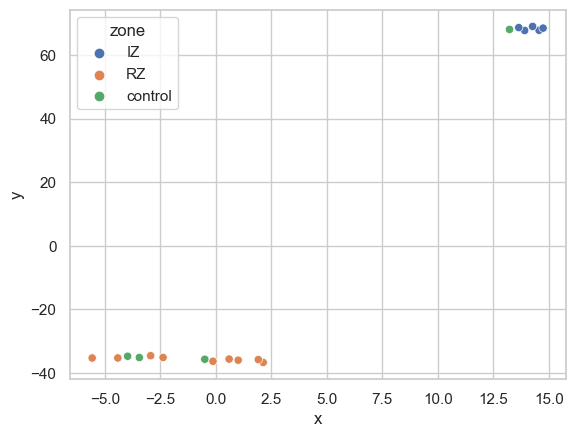

In [14]:
from heartnet import gw_utils
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

gw_output_dir = Path(f"/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/icg_cluster_results/config53_2023-08-22T090608")
exclude = ["FZ_P14", "FZ_P20", "FZ_P18", "FZ_GT_P19"]   # Samples to exluce from t-SNE visualization

# Get GW distances
gw_distances_dict = gw_utils.gw_dist_from_pkl(gw_output_dir, exclude=exclude)

# Turn into np.array
gw_distances_array, index = gw_utils.tuple_dict_to_2d_array(gw_distances_dict, symmetric=True, null_diagonal=True)

# Get zone labels
zones = []
for sample in index:
    if "control" in sample:
        zones.append("control")
    elif "RZ" in sample:
        zones.append("RZ")
    elif "IZ" in sample:
        zones.append("IZ")
    elif "FZ" in sample:
        zones.append("FZ")
    else:
        raise ValueError(f"no zone found for sample {sample}")

# t-SNE
tsne = TSNE(perplexity=5, metric="precomputed", init="random", verbose=1, method="exact", n_iter=5000)
tsne_features = tsne.fit_transform(gw_distances_array)

# Plot
tsne_dict = {'x' : tsne_features[:,0], 'y' : tsne_features[:,1], 'zone' : zones}
tsne_df = pd.DataFrame(tsne_dict, index=index)
fig, ax = plt.subplots()
sns.set_theme(style='whitegrid')
sns.scatterplot(x="x", y="y", hue='zone', data=tsne_df)

## Hierarchical Clustering

Time: 0.00043892860412597656 seconds.


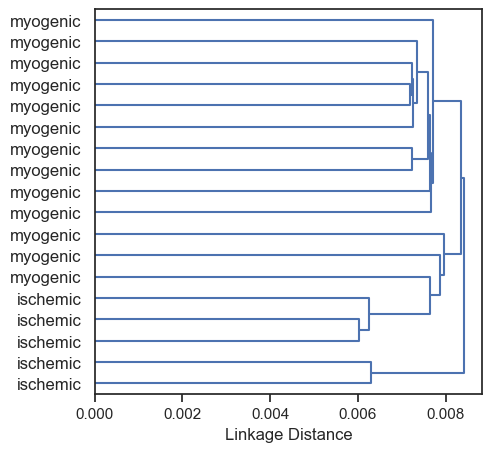

ARI: 0.35539743469712576


In [3]:
from pathlib import Path
import scipy.cluster.hierarchy as hierarchy
from scipy.spatial.distance import squareform
from heartnet import gw_utils, heartnet_utils
from sklearn.metrics.cluster import adjusted_rand_score
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time

config_num = 52
gw_output_dir = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/icg_cluster_results/config52_2023-08-31T120950")
labels_path = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/visium_metadata_2.csv")   # Path of ground truth file
linkage_method = "single"
exclude = ["FZ_P14", "FZ_P20", "FZ_P18", "FZ_GT_P19"]   # Samples to exclude from clustering
regularized = True   # Whether to use the regularized or unregularized GW distances

# Get GW distances
if regularized:
    gw_distances_dict = gw_utils.entr_gw_dist_from_pkl(gw_output_dir, exclude=exclude)
else:
    gw_distances_dict = gw_utils.gw_dist_from_pkl(gw_output_dir, exclude=exclude)

# Turn into np.array
gw_distances_array, index = gw_utils.tuple_dict_to_2d_array(gw_distances_dict, symmetric=True)

# Convert distance matrix into condensed form 
cond_dist_mat = squareform(gw_distances_array, checks=False)

# Perform hierarchical clustering
start = time.time()
linkage = hierarchy.linkage(cond_dist_mat, optimal_ordering=True, method=linkage_method)
end = time.time()
print(f"Time: {end-start} seconds.")

# Leaf labels
labels_dict = heartnet_utils.label_csv_to_dict(labels_path)
labels = []
for i in index:
    labels.append(labels_dict[i])

# Plot
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(5,5))
hierarchy.dendrogram(linkage, labels=labels, orientation='right')
ax.set_xlabel("Linkage Distance")
plt.show()

# Calculate ARI
cluster_labels = hierarchy.cut_tree(linkage, n_clusters=2)
cluster_df = pd.DataFrame(data = cluster_labels, columns=["labels_pred"], index = index)
cluster_df["labels_true"] = labels
adj_rand = adjusted_rand_score(labels_true=cluster_df["labels_true"], labels_pred=cluster_df["labels_pred"])
print(f"ARI: {adj_rand}")

# Save the figure
# root = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/Thesis/Thesis Tex/figures/appendices")
# file_name = f"dendrogram_c{config_num}_2clusters_{linkage_method}.pdf"
# save_file = root.joinpath(file_name)
# fig.savefig(save_file, bbox_inches='tight')

## Plot Clustermap

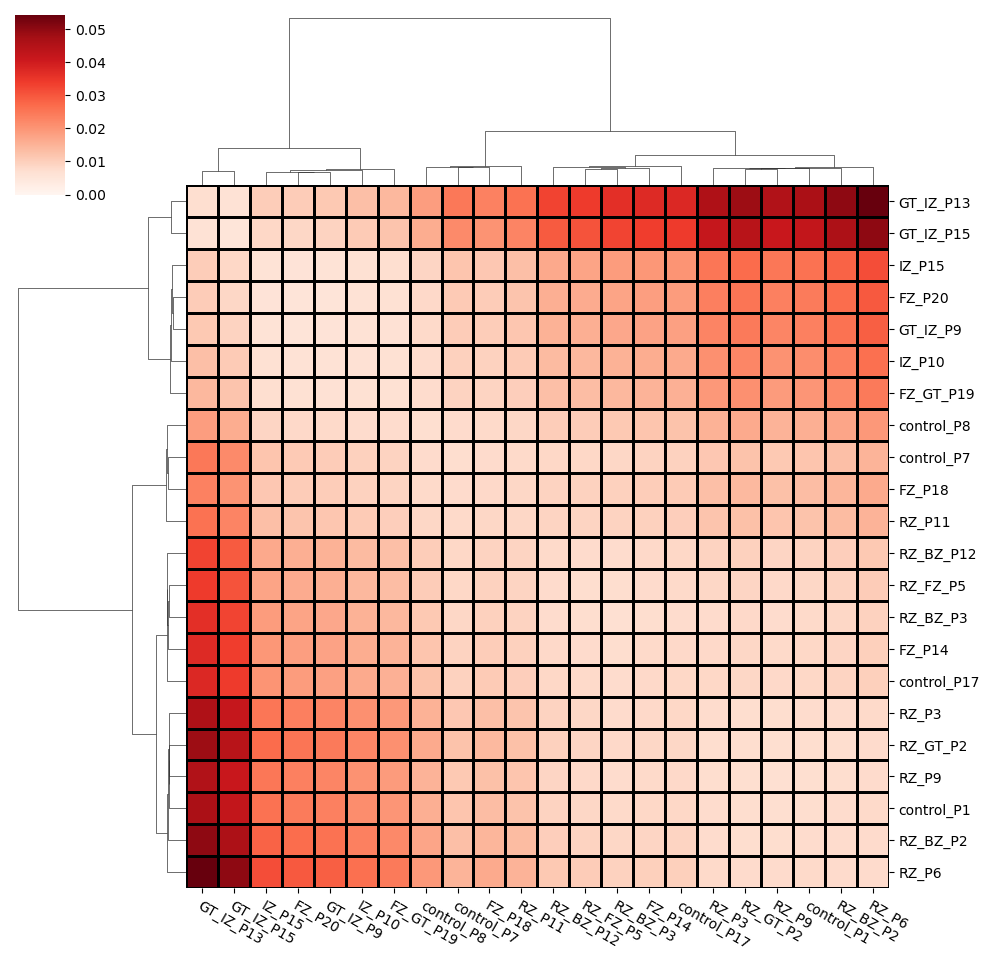

In [4]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from heartnet import gw_utils, heartnet_utils
import scipy.cluster.hierarchy as hierarchy
from scipy.spatial.distance import squareform

config_num = 52
gw_output_dir = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/icg_cluster_results/config52_2023-08-31T120950")
labels_path = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/visium_metadata_2.csv")   # Path of ground truth file
linkage_method = "single"
exclude = []   # Samples to exclude from clustering and clustergrid
regularized = True   # Whether to use the regularized or unregularized GW distances

# Get GW distances
if regularized:
    gw_distances_dict = gw_utils.entr_gw_dist_from_pkl(gw_output_dir, exclude=exclude)
else:
    gw_distances_dict = gw_utils.gw_dist_from_pkl(gw_output_dir, exclude=exclude)

# Turn into np.array
gw_distances_array, index = gw_utils.tuple_dict_to_2d_array(gw_distances_dict, symmetric=True)

# Convert distance matrix into condensed form 
cond_dist_mat = squareform(gw_distances_array, checks=False)

# Perform hierarchical clustering
row_linkage = hierarchy.linkage(cond_dist_mat, optimal_ordering=True, method='ward')

# Leaf labels
labels_dict = heartnet_utils.label_csv_to_dict(labels_path)
labels = []
for i in index:
    labels.append(labels_dict[i])

# To show class labels instead of sample names as tick labels, set index = labels
gw_distances_df = pd.DataFrame(gw_distances_array, index = index, columns = index)

# Perform hierarchical clustering
clustergrid = sns.clustermap(gw_distances_df, row_linkage=row_linkage, col_linkage=row_linkage,linewidth=2, linecolor='black', cmap="Reds", vmin=0)
plt.setp(clustergrid.ax_heatmap.xaxis.get_majorticklabels(), rotation=-30, ha='left', rotation_mode='anchor')
plt.show()

# Save the figure
# root = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/all_clustermaps_FZ")
# file_name = f"{gw_output_dir.name}_clustermap_entr_GW.pdf"
# save_file = save_path.joinpath(file_name)
# clustergrid.savefig(save_file, bbox_inches='tight')

### Plot and save all Seaborn Clustermaps

In [ ]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from heartnet import gw_utils
import scipy.cluster.hierarchy as hierarchy
from scipy.spatial.distance import squareform

results_path = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/icg_cluster_results")
save_path = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/all_clustermaps_FZ")
linkage_method = "ward"
exclude = []   # Samples to exclude from clusterings and clustergrids

for gw_output_dir in results_path.iterdir():
    if gw_output_dir.is_dir():
        # Get GW distances
        gw_distances_dict = gw_utils.gw_dist_from_pkl(gw_output_dir, exclude=exclude)
        entr_gw_distances_dict = gw_utils.entr_gw_dist_from_pkl(gw_output_dir, exclude=exclude)

        # Turn into np.array
        gw_distances_array, index = gw_utils.tuple_dict_to_2d_array(gw_distances_dict, symmetric=True, null_diagonal=False)
        entr_gw_distances_array, entr_index = gw_utils.tuple_dict_to_2d_array(entr_gw_distances_dict, symmetric=True, null_diagonal=False)

        # -------------------------- Plot GW distances ---------------------------------
        if len(gw_distances_array) > 0:
            fig, ax = plt.subplots(figsize=(10,10))

            # Convert distance matrix into condensed form 
            cond_dist_mat = squareform(gw_distances_array, checks=False)

            # Perform hierarchical clustering
            row_linkage = hierarchy.linkage(cond_dist_mat, optimal_ordering=True, method=linkage_method)

            labels = []
            for i in index:
                labels.append(labels_dict[i])

            gw_distances_df = pd.DataFrame(gw_distances_array, index = index, columns = index)

            # Perform hierarchical clustering
            clustergrid = sns.clustermap(gw_distances_df, row_linkage=row_linkage, col_linkage=row_linkage,linewidth=2, linecolor='black', cmap="Reds", vmin=0)
            plt.setp(clustergrid.ax_heatmap.xaxis.get_majorticklabels(), rotation=-30, ha='left', rotation_mode='anchor')

            # Save the figure
            file_name = f"{gw_output_dir.name}_clustermap_GW.pdf"
            save_file = save_path.joinpath(file_name)
            clustergrid.savefig(save_file, bbox_inches='tight')

        # -------------------- Plot Regularized GW distances ---------------------------
        if len(entr_gw_distances_array) > 0:
            fig, ax = plt.subplots(figsize=(10,10))

            # Convert distance matrix into condensed form 
            entr_cond_dist_mat = squareform(entr_gw_distances_array, checks=False)

            # Perform hierarchical clustering
            row_linkage = hierarchy.linkage(entr_cond_dist_mat, optimal_ordering=True, method=linkage_method)

            labels = []
            for i in index:
                labels.append(labels_dict[i])

            entr_gw_distances_df = pd.DataFrame(entr_gw_distances_array, index = entr_index, columns = entr_index)

            # Perform hierarchical clustering
            clustergrid = sns.clustermap(entr_gw_distances_df, row_linkage=row_linkage, col_linkage=row_linkage,linewidth=2, linecolor='black', cmap="Reds", vmin=0)
            plt.setp(clustergrid.ax_heatmap.xaxis.get_majorticklabels(), rotation=-30, ha='left', rotation_mode='anchor')

            # Save the figure
            file_name = f"{gw_output_dir.name}_clustermap_entr_GW.pdf"
            save_file = save_path.joinpath(file_name)
            clustergrid.savefig(save_file, bbox_inches='tight')

## Configs vs ARI

### Collect data and ARI of all configs in a DataFrame

In [2]:
from pathlib import Path
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score
from heartnet import clustering, heartnet_utils

ct_only = False

skip_configs = [9,10]   # Broken

configs_path = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/configs")
all_results_path = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/icg_cluster_results")
gt_labels_path = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/data/visium_metadata_2.csv")
gt_labels_dict = heartnet_utils.label_csv_to_dict(gt_labels_path)

linkage_methods = ["single", "complete", "average", "ward"]
n_clusters = [2,3]

columns = ["config_num", "regularized", "linkage", "n_clusters", "ARI"]
all_data = []

for gw_dir in all_results_path.iterdir():
    if gw_dir.is_dir():
        # Get config number
        stem = gw_dir.stem
        if ct_only:
            if stem.startswith("celltype_config"):
                config_num = int(stem.split("_")[1].split("config")[1])
            else:
                continue
        else:
            if stem.startswith("config"):
                config_num = int(stem.split("_")[0].split("config")[1])
            elif stem.startswith("gw"):
                config_num = int(stem.split("_")[1].split("config")[1])
            else:
                continue
        
        if config_num in skip_configs:
            continue

        # Find config file
        config_file = None
        for file in configs_path.iterdir():
            if file.stem == f"config{config_num}":
                config_file = file
                break
        if not config_file:
            raise ValueError(
                f"[ERROR] Couldn't find config file for config{config_num}."
            )
    
        for l in linkage_methods:
            for n in n_clusters:
                # If n == 2, we exclude fibrotic zone samples
                if n == 2:
                    exclude = ["FZ_P14", "FZ_P20", "FZ_P18", "FZ_GT_P19"]
                else:
                    exclude = []

                gw_cluster, entr_gw_cluster = clustering.agglomerative_hierarchical_clustering(
                    gw_dir,
                    gt_labels_dict,
                    method = l,
                    n_clusters = n,
                    exclude = exclude
                )

                if gw_cluster is not None:
                    gw_ari = adjusted_rand_score(
                        labels_true=gw_cluster["labels_true"],
                        labels_pred=gw_cluster["labels_pred"]
                    )
                    data = {}
                    data["config_num"] = config_num
                    data["linkage"] = l
                    data["n_clusters"] = n
                    data["regularized"] = False
                    data["ARI"] = gw_ari
                    
                    # Get rest of data from config file
                    config_data = heartnet_utils.config_file_to_flat_dict(config_file)
                    for key in config_data.keys():
                        data[key] = config_data[key]

                    data["epsilon"] = 0

                    all_data.append(data)

                if entr_gw_cluster is not None:
                    entr_gw_ari = adjusted_rand_score(
                        labels_true=entr_gw_cluster["labels_true"],
                        labels_pred=entr_gw_cluster["labels_pred"]
                    )
                    data = {}
                    data["config_num"] = config_num
                    data["linkage"] = l
                    data["n_clusters"] = n
                    data["regularized"] = True
                    data["ARI"] = entr_gw_ari

                    # Get rest of data from config file
                    config_data = heartnet_utils.config_file_to_flat_dict(config_file)
                    for key in config_data.keys():
                        data[key] = config_data[key]

                    all_data.append(data)

results_df = pd.DataFrame(all_data)

### Plot config vs ARI

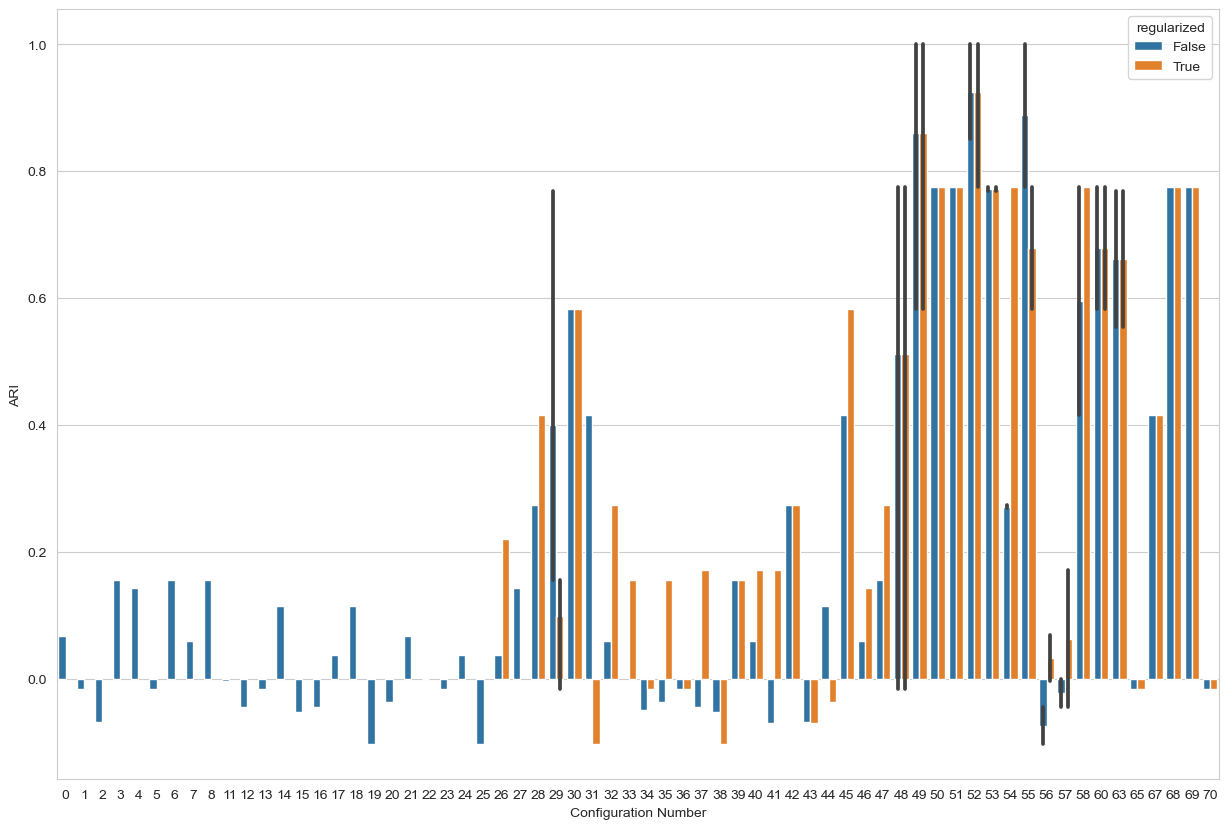

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

linkage_method = "ward"
n_clusters = 2

reduced_df = results_df[(results_df["linkage"] == linkage_method) & (results_df["n_clusters"] == n_clusters) & (results_df["config_num"] >= 0)]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
sns.barplot(reduced_df, x="config_num", y="ARI", hue="regularized")
ax.set_xlabel("Configuration Number")
plt.show()

# Save the figure
# root = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/Thesis/Thesis Tex/figures/appendices")
# file_name = f"config_num_vs_ARI.pdf"
# save_file = root.joinpath(file_name)
# fig.savefig(save_file, bbox_inches='tight')

### Plot linkage method vs ARI for a specific config

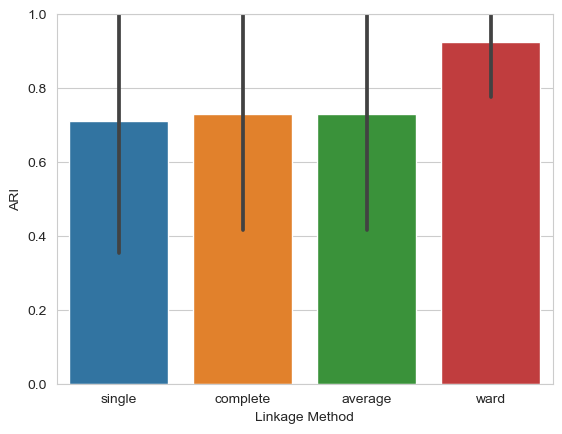

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

config_num = 52
n_clusters = 2

config_df = results_df[(results_df["config_num"] == config_num) & (results_df["n_clusters"] == n_clusters) & (results_df["regularized"] == True)]

sns.set_style("whitegrid")
fig, ax = plt.subplots()
sns.barplot(config_df, x="linkage", y="ARI")
ax.set_xlabel("Linkage Method")
ax.set_ylim([0,1])
plt.show()

# Save the figure
# root = Path("/Users/bob/Documents/Studium/8. Semester/Bachelorarbeit/Thesis/Thesis Tex/figures/appendices")
# file_name = f"celltype_linkage_ARI_c{config_num}.pdf"
# save_file = root.joinpath(file_name)
# fig.savefig(save_file, bbox_inches='tight')

### Plot correlation between ARI and parameters

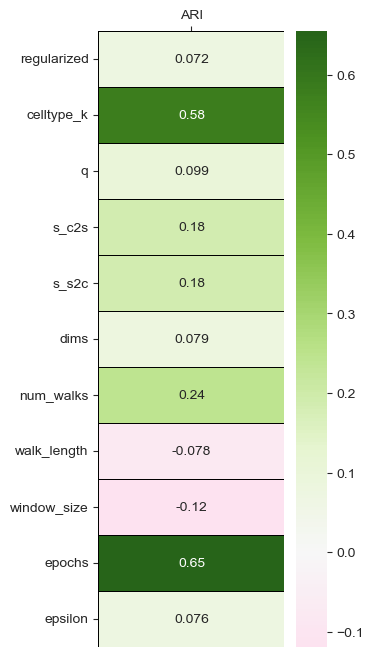

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

linkage_method = "ward"
n_clusters = 2

# Fix linkage, n_clusters, and GW distribution
df = results_df[(results_df["linkage"] == linkage_method) & (results_df["n_clusters"] == n_clusters) & (results_df["distribution"] == "uniform")]

# Drop columns which are non-number columns, are irrelevant, or contain only NaN
df = df.drop(["linkage","distribution","distribution","spot_norm","interlayer_norm","celltype_norm","n_clusters","alpha", "spot_k", "p", "interlayer_k", "interlayer_stds","config_num"], axis=1)

ari_corr = df.corr()[["ARI"]].drop("ARI", axis=0)

fig, ax = plt.subplots(figsize=(3,8))
sns.heatmap(ari_corr, annot=True, cmap="PiYG", center=0, linewidth=0.5, linecolor='black')

ax.yaxis.tick_left()
ax.xaxis.tick_top()

plt.show()

# Save the figure
# root = Path("/Users/bob/Desktop")
# file_name = f"heatmap.pdf"
# save_file = root.joinpath(file_name)
# fig.savefig(save_file, bbox_inches='tight')